In [2]:
import numpy as np
from scipy.optimize import fsolve
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['text.usetex'] = True

## Heat Capacity of substances

We know that from Aspen that the heat capacities of the components at $T = 423 [K]$ are

$
C_{p, Bz} = 133 [J /(mol K)]
$

$
C_{p, CHE} = 156 [J/(mol K)]
$

$
C_{p, CHA} = 156 [J/(mol K)]
$

$
C_{p, H_2} = 29.18 [J/(mol K)]
$

$
\Delta C_p = (C_{p, CHE} + C_{p, CHA}) - (C_{p, H_2} + C_{p, Bz} ) = 149.82 [J/(mol K)]
$

From [1], we know that the heat of reaction of reaction 1 and 2 are 

$
\Delta H_1 (423 [K]) = -95 [kJ / mol]
$

$
\Delta H_2 (423 [K]) = -215 [kJ / mol]
$

$
\Delta H_{total} (423 [K]) = \Delta H_1 (423 [K]) + \Delta H_2 (423 [K]) = -215 [kJ / mol]
$

$
\sum \theta_i C_{pi} = C_{p, Bz} + \dfrac{F_g}{0.99F_l} C_{p, H_2} = 133 [J /(mol K)] + \dfrac{10169 [kg / hr]}{412805 [kg / hr] \cdot 0.99} 29.18 [J/(mol K)] = 133.73 [J /(mol K)] 
$

The energy balance equation of the steady-state, non-isothermal CSTR equation is: 

$
X = \dfrac{\sum \theta_i \, C_{p i } (T - T_{i0})}{- \left[ \Delta H_{Rx}^0 (T_R) + \Delta C_p (T - T_R) \right]}
$

$
X = \dfrac{133.73 [J /(mol K)]  (T - 423 [K])}{- \left[ -215 \times 10^3 [J / mol] + 149.82 [J/(mol K)] \, (T - 423 [K]) \right]}
$

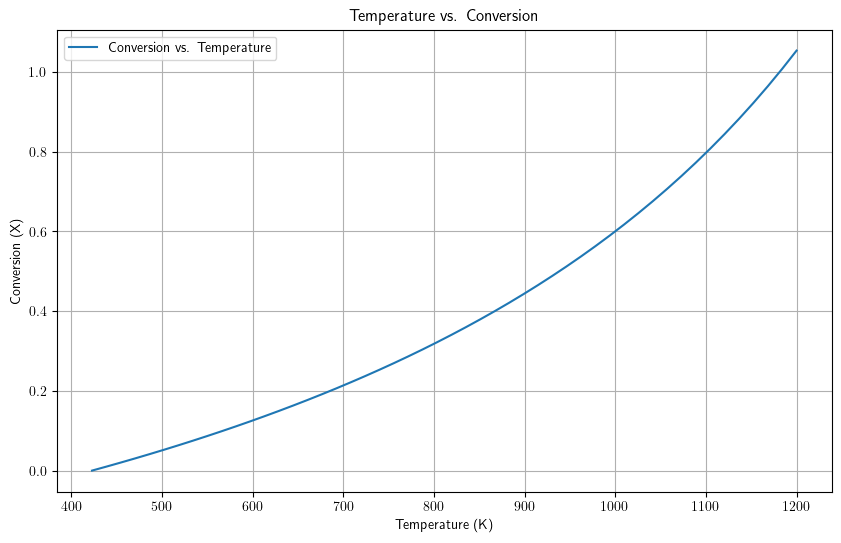

In [13]:
# Define the temperature range
T = np.linspace(423, 1200, 50)  # Temperature from 423K to 1000K

# Define the equation for conversion (X)
X = (133.73 * (T - 423)) / (-(-215e3 + 149.82 * (T - 423)))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(T, X, label='Conversion vs. Temperature')
plt.title('Temperature vs. Conversion')
plt.xlabel('Temperature (K)')
plt.ylabel('Conversion (X)')
plt.grid(True)
plt.legend()
plt.savefig(".")
plt.show()


In [33]:
Adiabatic_temp_rise = T[-2] - 423
print(f"The adiabatic temperature rise is: {Adiabatic_temp_rise:.2f} [K] when conversion X reaches {X[-2]:.1f}")

The adiabatic temperature rise is: 761.14 [K] when conversion X reaches 1.0


## The Heat Duty of the adiabatic temperature rise


$
Q = M \cdot C_p \cdot \Delta T_{adiab}
$

where 

$M$ is the mass flow rate $[kg / s]$

$C_p$ is the specific heat capacity of the reactor contents $[J / (kg \cdot K)]$



Since we know that the inlet gas and liquid mass flow rates and their specific heat capacity

$M_g = 10179 [kg / hr] = 2.8275 \, [kg / s]$ (Mass flow rate of inlet gas stream)

$M_l = 412805 [kg / hr] = 114.6680 \, [kg / s]$ (Mass flow rate of inlet liquid stream)


In [32]:
# Mass flow rate of gas stream
Mg = 2.8275 # [kg / s]

# Mass flow rate of liquid stream
Ml = 114.6680 # [kg / s]

# Heat capacity of liquid
C_pl = 2.93e4 / 1000 / (78 / 1000)  # [J kg^-1 K^-1]

# print(f"Heat Capacity of liquid: {C_pl:.1f} [J kg^-1 K^-1]")

# Heat capacity of gas
C_pg_star = 1.92e5 / 1000 / (2 / 1000)  # [J kg^-1 K^-1]

# print(f"Heat Capacity of gas: {C_pg_star} [J kg^-1 K^-1]")

In [38]:
Q = Adiabatic_temp_rise * (Mg * C_pg_star + Ml * C_pl)
print(f"Heat Duty: {Q} [W] = {Q/ 10**6:.1f} [MW]")

Heat Duty: 239390088.47472525 [W] = 239.4 [MW]
